Make a jupyter notebook that uses mdtraj to 
	a) read in the md trajectory of beta amyloid
	b) compute the end-end distance at each time, and the radius of gyration at each time
	c) plot the end-end distance and radius of gyration vs time on the same plot, clearly labeled (same y axis is fine this time)
	d) plot a normalized histogram of end-end distance and another of radius of gyration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [4]:
traj = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

In [7]:
#from end_end anaylsis
# get the first and last atom
def end_end(traj):
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

# compute the distance between the first and last atom
dist = end_end(traj)


In [10]:
#radius of gyration
def radius_of_gyration(traj):
    # compute the center of mass of the trajectory
    com = md.compute_center_of_mass(traj)
    # compute the squared distance of each atom to the center of mass
    squared_distance = np.sum((traj.xyz - com[:, None, :])**2, axis=2)
    # compute the radius of gyration
    Rg = np.sqrt(np.sum(squared_distance, axis=1) / traj.n_atoms)
    return Rg

# compute the radius of gyration
Rg = radius_of_gyration(traj)


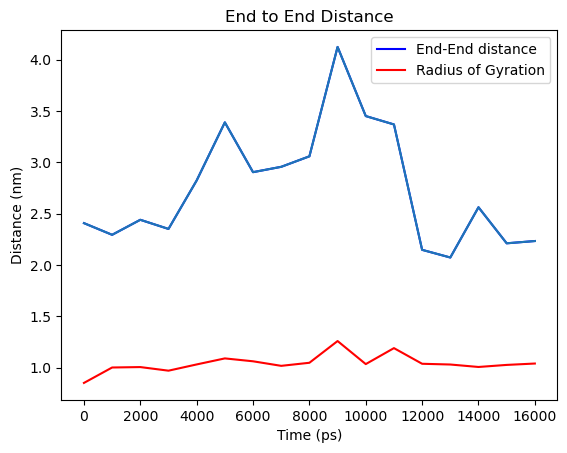

In [20]:
#plot distance/radius of gyration vs time
plt.plot(traj.time, dist, c='b', label='End-End distance')
plt.plot(traj.time, dist)
plt.plot(traj.time, Rg, c='r', label='Radius of Gyration')
plt.xlabel('Time (ps)')
plt.ylabel('Distance (nm)')
plt.title('End to End Distance')
plt.legend()
plt.show()

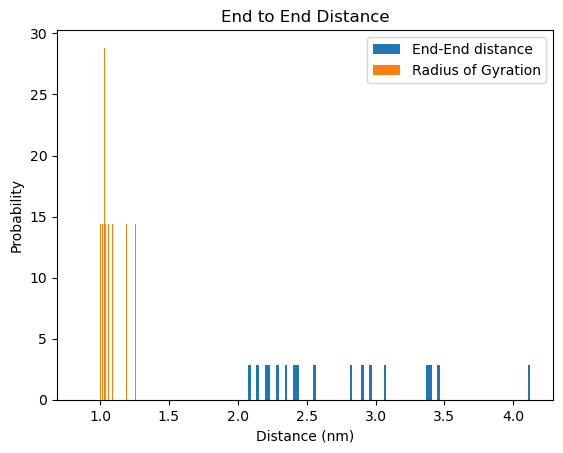

In [23]:
#plot a normalized histogram of end-end distance and another of radius of gyration
plt.hist(dist, bins=100, density=True, label='End-End distance')
plt.hist(Rg, bins=100, density=True, label='Radius of Gyration')
plt.xlabel('Distance (nm)')
plt.ylabel('Probability')
plt.title('End to End Distance')
plt.legend()
plt.show()
